<a href="https://colab.research.google.com/github/jjdub82/...../blob/master/Stock_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dependencies

In [342]:
pip install pandas table plotting


In [343]:
pip install yfinance

In [344]:
pip install dataframe-image

In [345]:
pip install fpdf2

In [346]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import requests
from PIL import Image
%matplotlib inline

In [347]:
from datetime import date
from datetime import datetime
from datetime import timedelta
today = str(date.today())
current_year = date.today().year

In [348]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator
from numpy import array
from matplotlib import ticker

In [349]:
from fpdf import FPDF

# Company Selection

In [350]:
ticker = yf.Ticker(input("Enter Ticker\n"))

Enter Ticker
JNJ


In [351]:
ticker_symbol = str(ticker.info['symbol'])
urlObject = 'https://finance.yahoo.com/quote/'+ticker_symbol+'/cash-flow?p='+ticker_symbol
print(urlObject)

https://finance.yahoo.com/quote/JNJ/cash-flow?p=JNJ


In [352]:
append_ttm = float(input('Enter TTM Free Cashflow.  Look it up at ' + urlObject+' \n'))

Enter TTM Free Cashflow.  Look it up at https://finance.yahoo.com/quote/JNJ/cash-flow?p=JNJ 
22564000000


In [353]:
recommendations_df = ticker.recommendations
recommendations_df.reset_index(inplace=True)
recommendations_df.columns


Index(['Date', 'Firm', 'To Grade', 'From Grade', 'Action'], dtype='object')

In [354]:
ticker.info
book_value = str(ticker.info['bookValue'])
fifty_day_avg_price = str(ticker.info['fiftyDayAverage'])
fifty_two_high = str(ticker.info['fiftyTwoWeekHigh'])
fifty_two_low = str(ticker.info['fiftyTwoWeekLow'])
forward_PE = str(ticker.info['forwardPE'])
forward_EPS = str(ticker.info['forwardEps'])
peg_ratio = str(ticker.info['pegRatio'])
price_to_book = str(ticker.info['priceToBook'])
target_low_price = str(ticker.info['targetLowPrice'])
target_median_price = str(ticker.info['targetMedianPrice'])
market_cap_str = str(ticker.info['marketCap'])
market_cap_num = ticker.info['marketCap']

In [355]:
free_cash_ttm = ticker.info['freeCashflow']

In [356]:
last_year = datetime.today() - timedelta(days=365)
print(last_year)

2020-08-28 11:22:06.584282


In [357]:
pe_ratio = ticker.info['trailingPE']

In [358]:
recommendations_df['Year'] = recommendations_df['Date'].dt.year
current_recommendations_1yr = recommendations_df.loc[recommendations_df['Date']>=last_year]
current_recommendations_1mo = recommendations_df.loc[recommendations_df['Date']>=datetime.today() - timedelta(days=31)]
current_recommendations_3mo = recommendations_df.loc[recommendations_df['Date']>=datetime.today() - timedelta(days=90)]
current_recommendations_6mo = recommendations_df.loc[recommendations_df['Date']>=datetime.today() - timedelta(days=180)]
current_recommendations_6mo


,Date,Firm,To Grade,From Grade,Action,Year


In [359]:
ticker.info['grossMargins']

0.67120004

In [360]:
gross_margin = ticker.info['grossMargins']
market_cap = ticker.info['marketCap']
shares_outstanding = ticker.info['sharesOutstanding']

In [361]:
finance = ticker.financials

FINANCE STATEMENT DATAFRAMES

In [362]:
finance = finance.set_axis(['2020', '2019', '2018', '2017'], axis = 'columns')

In [363]:
finance.index.name = 'Category'
finance

,2020,2019,2018,2017
Category,,,,
Research Development,1.2159e+10,1.1355e+10,1.0775e+10,1.0594e+10
Effect Of Accounting Charges,None,None,None,None
Income Before Tax,1.6497e+10,1.7328e+10,1.7999e+10,1.7673e+10
Minority Interest,None,None,None,None
Net Income,1.4714e+10,1.5119e+10,1.5297e+10,1.3e+09
Selling General Administrative,2.2084e+10,2.2178e+10,2.254e+10,2.152e+10
Gross Profit,5.4257e+10,5.4503e+10,5.449e+10,5.1011e+10
Ebit,2.0014e+10,2.097e+10,2.1175e+10,1.8897e+10
Operating Income,2.0014e+10,2.097e+10,2.1175e+10,1.8897e+10


In [364]:
sga_list = list(finance.loc['Selling General Administrative'])
ebit_list = list(finance.loc['Ebit'])
income_tax_list = list(finance.loc['Income Tax Expense'])
interest_list = list(finance.loc['Interest Expense'])

In [365]:
bal_sheet = ticker.balancesheet
bal_sheet = bal_sheet.set_axis(['2020', '2019', '2018', '2017'], axis = 'columns')
bal_sheet.index.name = 'Category'

cashflow = ticker.cashflow
cashflow = cashflow.set_axis(['2020', '2019', '2018', '2017'], axis = 'columns')
cashflow.index.name = 'Category'


In [366]:
operating_margins = ticker.info['operatingMargins']

In [367]:
operating_cashflow = ticker.info['operatingCashflow']

In [368]:
df_fin = finance.loc[['Operating Income','Net Income','Research Development','Cost Of Revenue', 'Total Revenue', 'Total Operating Expenses', 'Gross Profit']]

In [369]:
df_fin

,2020,2019,2018,2017
Category,,,,
Operating Income,2.0014e+10,2.097e+10,2.1175e+10,1.8897e+10
Net Income,1.4714e+10,1.5119e+10,1.5297e+10,1.3e+09
Research Development,1.2159e+10,1.1355e+10,1.0775e+10,1.0594e+10
Cost Of Revenue,2.8327e+10,2.7556e+10,2.7091e+10,2.5439e+10
Total Revenue,8.2584e+10,8.2059e+10,8.1581e+10,7.645e+10
Total Operating Expenses,6.257e+10,6.1089e+10,6.0406e+10,5.7553e+10
Gross Profit,5.4257e+10,5.4503e+10,5.449e+10,5.1011e+10


In [370]:
operating_income_list = list(df_fin.loc['Operating Income'])
net_income_list = list(df_fin.loc['Net Income'])
research_list = list(df_fin.loc['Research Development'])
cost_of_revenue = list(df_fin.loc['Cost Of Revenue'])
total_revenue_list = list(df_fin.loc['Total Revenue'])
total_Operating_expense_list = list(df_fin.loc['Total Operating Expenses'])
gross_profit_list = list(df_fin.loc['Gross Profit'])

In [371]:
growth_rate = (total_revenue_list[0]-total_revenue_list[1])/total_revenue_list[1]
print(growth_rate)

0.006397835703579132


In [372]:
cashflow

,2020,2019,2018,2017
Category,,,,
Investments,-8.952000e+09,-5.330000e+08,-1.337000e+09,2.196400e+10
Change To Liabilities,5.141000e+09,4.060000e+09,3.951000e+09,2.725000e+09
Total Cashflows From Investing Activities,-2.082500e+10,-6.194000e+09,-3.167000e+09,-1.486800e+10
Net Borrowings,7.095000e+09,-2.881000e+09,-3.949000e+09,6.754000e+09
Total Cash From Financing Activities,-6.120000e+09,-1.801500e+10,-1.851000e+10,-7.673000e+09
Change To Operating Activities,-2.960000e+09,3.710000e+08,-2.119000e+09,8.568000e+09
Issuance Of Stock,1.114000e+09,9.540000e+08,9.490000e+08,1.062000e+09
Net Income,1.471400e+10,1.511900e+10,1.529700e+10,1.300000e+09
Change In Cash,-3.320000e+09,-8.020000e+08,2.830000e+08,-1.148000e+09


In [373]:
capX_list = list(cashflow.loc['Capital Expenditures'])
depreciation_list = list(cashflow.loc['Depreciation'])

In [374]:
df_cash = cashflow.loc[['Depreciation', 'Net Income']]

In [375]:
df_bal = bal_sheet.loc[['Cash', 'Inventory']]

In [376]:
cash_list = list(bal_sheet.loc['Cash'])
cash_list

[13985000000.0, 17305000000.0, 18107000000.0, 17824000000.0]

In [377]:
research_list

[12159000000.0, 11355000000.0, 10775000000.0, 10594000000.0]

In [378]:
total_revenue_list

[82584000000.0, 82059000000.0, 81581000000.0, 76450000000.0]

In [379]:
gross_margins_list = [gross_profit_list[0] /  total_revenue_list[0], gross_profit_list[1] /  total_revenue_list[1], gross_profit_list[2] /  total_revenue_list[2], gross_profit_list[3] /  total_revenue_list[3]]
print(gross_margins_list)

[0.6569916690884433, 0.6641928368612827, 0.6679251296257707, 0.6672465663832571]


In [380]:
SGA_Ratio = [sga_list[0]/ gross_profit_list[0], sga_list[1]/ gross_profit_list[1], sga_list[2]/ gross_profit_list[2], sga_list[3]/ gross_profit_list[3]]
print(SGA_Ratio)

[0.40702582155297934, 0.40691338091481205, 0.4136538814461369, 0.4218697927897904]


In [381]:
try:
  research_ratio = [research_list[0] / gross_profit_list[0],research_list[1] / gross_profit_list[1],research_list[2] / gross_profit_list[2],research_list[3] / gross_profit_list[3]]
  print(research_ratio)
except:
  print('None')

[0.2241001161140498, 0.20833715575289433, 0.19774270508350156, 0.20768069632040148]


In [382]:
depreciation_ratio = [depreciation_list[0] / gross_profit_list [0], depreciation_list[1] / gross_profit_list [1], depreciation_list[2] / gross_profit_list [2], depreciation_list[3] / gross_profit_list [3]]
print(depreciation_ratio)

[0.13327312604825184, 0.128598425774728, 0.12716094696274546, 0.11060359530297387]


In [383]:
interest_ratio = [interest_list[0] / gross_profit_list[0], interest_list[1] / gross_profit_list[1], interest_list[2] / gross_profit_list[2], interest_list[3] / gross_profit_list[3]]
print(interest_ratio)

[-0.00370459111266749, -0.00583454121791461, -0.01844375114699945, -0.018309776322753917]


In [384]:
operating_cashflow_list = list(cashflow.loc['Total Cash From Operating Activities'])
free_cashflow_list = [operating_cashflow_list[0] + capX_list[0], operating_cashflow_list[1] + capX_list[1], operating_cashflow_list[2] + capX_list[2], operating_cashflow_list[3] + capX_list[3]]
print(free_cashflow_list)

[20189000000.0, 19918000000.0, 18531000000.0, 17777000000.0]


In [385]:
#ttm_cash = float(free_cash_flow_manual[0])
last_year_cash = float(free_cashflow_list[0])
two_year_cash = float(free_cashflow_list[1])
three_year_cash = float(free_cashflow_list[2])
four_year_cash = float(free_cashflow_list[3])


In [386]:
cashflow_growth_rate = [(last_year_cash- two_year_cash)/ two_year_cash, (two_year_cash - three_year_cash)/ three_year_cash, (three_year_cash - four_year_cash)/ four_year_cash]
print(cashflow_growth_rate)

[0.013605783713224219, 0.07484755274944688, 0.04241435562805873]


In [387]:
dividend = ticker.info['dividendRate']
print(dividend)

4.24


In [388]:
earnings_df = ticker.earnings
earnings_list = list(ticker.earnings['Earnings'])
print(earnings_list)
eps_est_list = [earnings_list[0] / shares_outstanding, earnings_list[1] / shares_outstanding, earnings_list[2] / shares_outstanding]
print(eps_est_list)


[1300000000, 15297000000, 15119000000, 14714000000]
[0.49383091229563, 5.810870357989424, 5.743253509998176]


In [389]:
total_assets_list = list(bal_sheet.loc['Total Assets'])
liability_list = list(bal_sheet.loc['Total Liab'])
Shareholdr_equity_list = [total_assets_list[0]-liability_list[0], total_assets_list[1]-liability_list[1], total_assets_list[2]-liability_list[2], total_assets_list[3]-liability_list[3]]

print(total_assets_list)
print(liability_list)
print(Shareholdr_equity_list)

[174894000000.0, 157728000000.0, 152954000000.0, 157303000000.0]
[111616000000.0, 98257000000.0, 93202000000.0, 97143000000.0]
[63278000000.0, 59471000000.0, 59752000000.0, 60160000000.0]


In [390]:
dividend_rate = str(ticker.info['dividendRate'])
dividend_yield2 = str(ticker.info['dividendYield'])
try:
  dividend_yield = "{:.2%}".format(ticker.info['dividendYield'])
except: 
  print('No Divs')
print(dividend_yield)

2.45%




```
# This is formatted as code
```

# Data Conversions

In [391]:
current_priceSTR= str(ticker.info['currentPrice'])
gross_margin_current = f"{gross_margin:.2%}"
gross_margin_hist = []
for i in gross_margins_list:
  gross_margin_hist.append(f"{i:.2%}")

print(gross_margin_hist)

gross_marginSTR= ', '.join(map(str, gross_margin_hist))
  
print(gross_marginSTR)

['65.70%', '66.42%', '66.79%', '66.72%']
65.70%, 66.42%, 66.79%, 66.72%


In [392]:
years = [current_year - 1,current_year - 2, current_year - 3,current_year - 4]

def merge(list1, list2):
      
    merged_list = tuple(zip(list1, list2)) 
    return merged_list
      
# Driver code
earnings_tuples = merge(years, earnings_list)
free_cash_merge = merge(years, free_cashflow_list)
gross_margin_tuples = (merge(years, gross_margin_hist))
SGA_Ratio_tuples = (merge(years,SGA_Ratio))
research_ratio_tuples = merge(years,research_ratio)
cashflow_growth = merge(years,cashflow_growth_rate)
gross_profit_merge = merge(years,gross_profit_list)
total_revenue_merge = merge(years,total_revenue_list)

print(cashflow_growth)

((2020, 0.013605783713224219), (2019, 0.07484755274944688), (2018, 0.04241435562805873))


In [393]:
# create DataFrame using data
def tuples_to_df(tuple):
  new_df = pd.DataFrame(tuple, columns =['Years', 'Measure'])
  return new_df
  

sga_df = tuples_to_df(SGA_Ratio_tuples)
research_df = tuples_to_df(research_ratio_tuples)
research_df.Measure = (research_df.Measure * 100).round(decimals=2)
gross_margin_df = tuples_to_df(gross_margin_tuples)
cashflow_growth_df = tuples_to_df(cashflow_growth).round(decimals=2)
grossprofit_df = tuples_to_df(gross_profit_merge).round(decimals=2)
total_revenue_df = tuples_to_df(total_revenue_merge)
free_cash_df = tuples_to_df(free_cash_merge)
earnings_df = tuples_to_df(earnings_tuples)
free_cash_df

,Years,Measure
0,2020,2.018900e+10
1,2019,1.991800e+10
2,2018,1.853100e+10
3,2017,1.777700e+10


In [394]:
free_cashflow_list

[20189000000.0, 19918000000.0, 18531000000.0, 17777000000.0]

In [395]:
total_revenue_df

,Years,Measure
0,2020,8.258400e+10
1,2019,8.205900e+10
2,2018,8.158100e+10
3,2017,7.645000e+10


In [396]:
earnings_df

,Years,Measure
0,2020,1300000000
1,2019,15297000000
2,2018,15119000000
3,2017,14714000000


# Charts and Tables

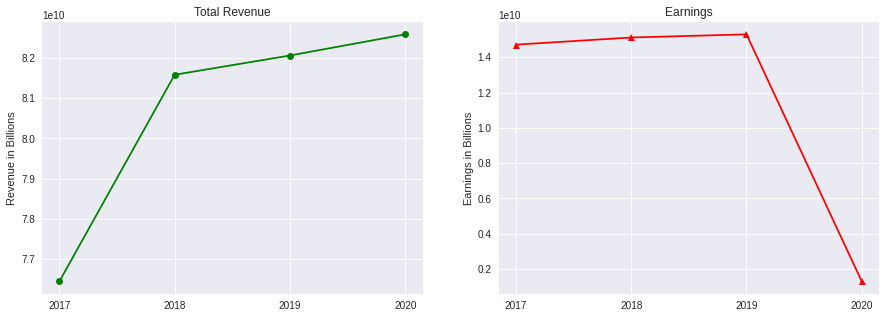

<Figure size 432x288 with 0 Axes>

In [397]:
fig3 = plt.figure(3,(15,5))
rev_plot= fig3.add_subplot(121)
rev_plot.plot(total_revenue_df.Years,total_revenue_df.Measure, 'go-')
rev_plot.set_ylabel('Revenue in Billions')
rev_plot.set_title('Total Revenue')
rev_plot.xaxis.set_major_locator(MaxNLocator(integer=True))
earnings_plot = fig3.add_subplot(122)
earnings_plot.plot(earnings_df.Years, earnings_df.Measure, 'r^-')
earnings_plot.xaxis.set_major_locator(MaxNLocator(integer=True))
earnings_plot.set_title('Earnings')
earnings_plot.set_ylabel('Earnings in Billions')
plt.show()
plt.savefig('earnings and revenue.png')
fig3.savefig('earnings and revenue.png')

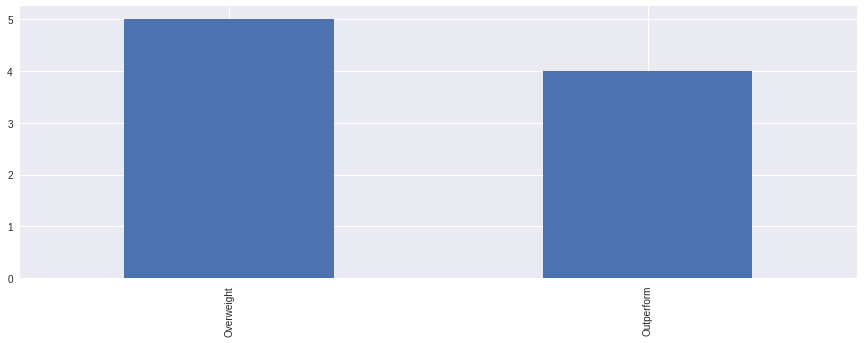

<Figure size 432x288 with 0 Axes>

In [398]:
current_recommendations_1yr['To Grade'].value_counts().plot(kind = 'bar', figsize=(15,5))
plt.show()
plt.savefig('recommendations bar chart.png')

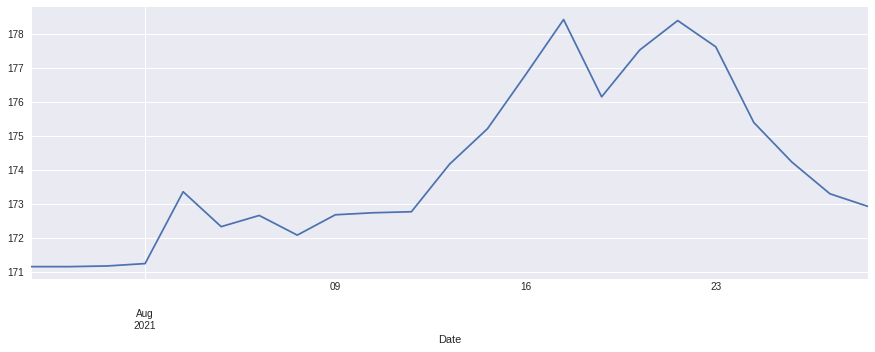

In [399]:
ticker_hist = ticker.history()
closing_prices =ticker_hist['Close']
closing_prices.plot(kind = 'line', figsize = (15,5))
plt.xlabel = 'Date'
plt.ylabel = 'Closing Price'
plt.savefig('close price fig.jpg')

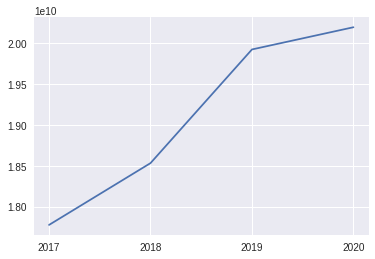

In [400]:
cashflow_dict = {'index':[0,1,2,3], 'period': ['2020', '2019', '2018', '2017'], 'cashflow':[last_year_cash,two_year_cash,three_year_cash,four_year_cash]}
    
   # 'ttm': ttm_cash, '2020': last_year_cash, '2019': two_year_cash, '2018': three_year_cash, '2017': four_year_cash}
cashflow_dataframe = pd.DataFrame.from_dict(cashflow_dict)
cashflow_dataframe = cashflow_dataframe.sort_values(by= 'index', ascending=False)
plt.plot(cashflow_dataframe.period, cashflow_dataframe.cashflow)
plt.show()

In [401]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [402]:
plt.style.use('seaborn')

In [403]:
gross_margin_df = gross_margin_df.sort_index(ascending=False)

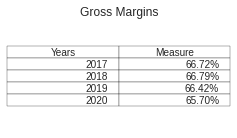

In [404]:
fig, ax =plt.subplots(figsize=(4,2))
ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText = gross_margin_df.values,colLabels=sga_df.columns,loc='center')
ax.set_title('Gross Margins')

plt.savefig('sgaTbl.png')

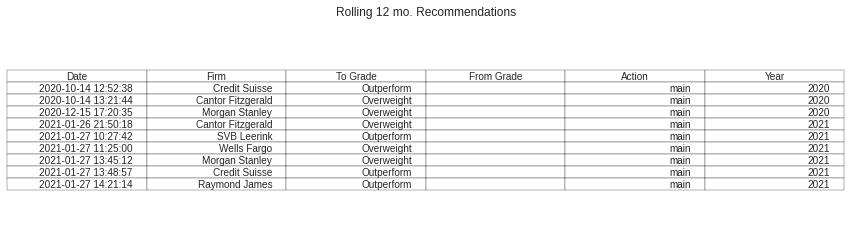

In [405]:
fig, ax =plt.subplots(figsize=(15,4))
ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText = current_recommendations_1yr.values,colLabels=current_recommendations_6mo.columns,loc='center')
ax.set_title('Rolling 12 mo. Recommendations')
plt.savefig('Recommendations.png')

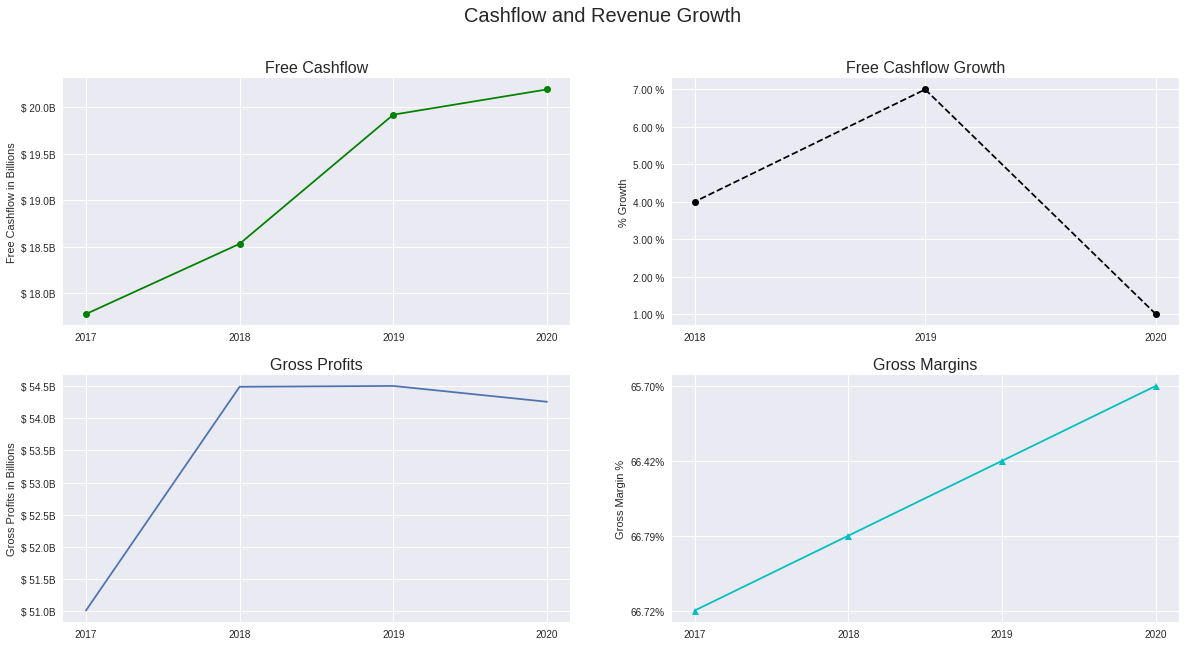

In [416]:
fig1 = plt.figure(1,figsize= (20,10))
fig1.suptitle('Cashflow and Revenue Growth', fontsize = 20)

def billionsFormatter(x, pos):
  return "$ {0}B".format(x/1000000000)

def percentFormatter(x,pos):
  return "{0:0.2f} %".format(x*100)


free_cash_plot = fig1.add_subplot(221)
free_cash_growth = fig1.add_subplot(222)
gross_margin_growth = fig1.add_subplot(224)
gross_profit_chart = fig1.add_subplot(223)

free_cash_plot.plot(cashflow_dataframe.period, cashflow_dataframe.cashflow, 'go-')
free_cash_plot.set_ylabel('Free Cashflow in Billions')
free_cash_plot.set_title('Free Cashflow', fontsize = 16)
free_cash_plot.yaxis.set_major_formatter(plt.FuncFormatter(billionsFormatter))


free_cash_growth.plot(cashflow_growth_df.Years, cashflow_growth_df.Measure, 'ko--')
free_cash_growth.xaxis.set_major_locator(MaxNLocator(integer=True))
free_cash_growth.set_ylabel('% Growth')
free_cash_growth.set_title('Free Cashflow Growth', fontsize = 16)
#free_cash_growth.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=5))
free_cash_growth.yaxis.set_major_formatter(plt.FuncFormatter(percentFormatter))

gross_margin_growth.plot(gross_margin_df.Years, gross_margin_df.Measure, 'c^-')
gross_margin_growth.xaxis.set_major_locator(MaxNLocator(integer=True))
gross_margin_growth.set_ylabel('Gross Margin %')
gross_margin_growth.invert_yaxis=False
gross_margin_growth.set_title('Gross Margins', fontsize = 16)
#gross_margin_growth.set_ylim(20, 80)


gross_profit_chart.plot(grossprofit_df.Years, grossprofit_df.Measure)
gross_profit_chart.xaxis.set_major_locator(MaxNLocator(integer=True))
gross_profit_chart.set_ylabel('Gross Profits in Billions')
gross_profit_chart.set_title('Gross Profits', fontsize = 16)
#gross_profit_chart.yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:0.2f}'))
gross_profit_chart.yaxis.set_major_formatter(plt.FuncFormatter(billionsFormatter))


plt.show()

fig1.savefig('profits and cash.png')



In [407]:
(current_recommendations_6mo['To Grade'])

Series([], Name: To Grade, dtype: object)

# Value Models


EPS Method

In [408]:
trailing_eps = ticker.info['trailingEps']
five_yr_intrinsic = (trailing_eps * (1+ fcf_growth_average)**5) * pe_ratio
Fair_Market_Value_EPS_Method = str("${:,.2f}".format(five_yr_intrinsic/(1+.10)**5))
Fair_Market_Value_EPS_Method

'$173.89'

Discounted Free Cashflow Model

In [409]:
year_zero = free_cashflow_list[0]
year_neg_one = free_cashflow_list[1]
year_neg_two = free_cashflow_list[2]
year_neg_three = free_cashflow_list[3]

#proceed = input('Do you want to append TTM? y/n:  ')
#if proceed == 'y':

free_cashflow_list.append(append_ttm)
fcf_growth = [
              (year_neg_two - year_neg_three) / year_neg_three, 
              (year_neg_one - year_neg_two) / year_neg_two, 
              (year_zero - year_neg_one) / year_neg_one, 
              (float(free_cashflow_list[4]) - year_zero) / year_zero
              ]
year = [1, 2, 3, 4]
fcf_list_new = [year_neg_three, year_neg_two, year_neg_one, year_zero, append_ttm]
#else: 
 # fcf_growth = [
  #              (year_neg_two - year_neg_three) / year_neg_three, 
   #             (year_neg_one - year_neg_two) / year_neg_two, 
    #            (year_zero - year_neg_one) / year_neg_one
     #           ]
  #year = [1,2, 3]
  #fcf_list_new = [year_neg_three, year_neg_two, year_neg_one, year_zero]
fcf_list_new


[17777000000.0, 18531000000.0, 19918000000.0, 20189000000.0, 22564000000.0]

In [410]:
from statistics import mean

def average(lst):
  return mean(lst)

fcf_growth_average = average(fcf_growth)
fcf_growth_average

0.062126502496653434

In [411]:
fcf_list_new[-1]

22564000000.0

In [412]:
#Assumptions:
required_rate = 0.08
perpetual_rate = 0.02
cashflow_growth = float(fcf_growth_average)




# Empty Lists
future_cashflow = []
discount_factor = []
discounted_future_cashflow = []



for i in year:
  cashflowDCF = fcf_list_new[-1] * (1+ cashflow_growth)**i
  future_cashflow.append(cashflowDCF)
  discount_factor.append((1 + required_rate) ** i)

for i in range (0, len(year)):
  discounted_future_cashflow.append(future_cashflow[i]/discount_factor[i])

#print(discounted_future_cashflow)

terminal_value = future_cashflow[-1] * (1 + perpetual_rate)/(required_rate - perpetual_rate)


discounted_terminal_value = terminal_value/(1 + required_rate)**4
discounted_future_cashflow.append(discounted_terminal_value)

today_value = sum(discounted_future_cashflow)

fair_value = (today_value / shares_outstanding)

fair_value_safe = fair_value*.9
print("${}".format(round(fair_value, 2)))
print("${}".format(round(fair_value_safe,2)))
print(fifty_two_low)
print(fifty_day_avg_price)

$169.19
$152.28
133.65
173.01886


# Logo

# Create PDF Output

In [413]:
pWidth = 210
pHeight = 297

class PDF(FPDF):
  def header (self):
    self.set_font('Arial', 'B', 15)
    self.cell(0,10,'Stock Analysis for ' + ticker.info['longName'],1,1,'L')
    self.cell(0,10, 'Date:  ' + today)
    self.ln(20)
  
  def footer (self):
    self.set_y(-15)
    self.set_font('Arial', 'I', 8)
    #self.image('ticker.logo.png')
    self.cell(0,10, 'Page ' + str(self.page_no()) + '/{nb}', 0, 0, 'c')
    


pdf = PDF()
pdf.alias_nb_pages()
pdf.set_auto_page_break(auto=True, margin = 15)
# Cover Page
pdf.add_page()
pdf.set_font('helvetica', '', 16)
pdf.cell(0,10, 'Current Price:  ' + current_priceSTR + '     EPS Fair Marekt Value:  '+ Fair_Market_Value_EPS_Method, ln=1)
#pdf.cell(0,10, 'EPS Fair Marekt Value:  '+ Fair_Market_Value_EPS_Method,ln=1)
pdf.cell(0,10,'Gross Margins:  ' + gross_margin_current,ln=1)
pdf.cell(0,10,'Past Gross Margins:  ' + gross_marginSTR ,ln=1)
pdf.cell(0,10,'Dividend Rate:  ' + dividend_rate +'    Dividend Yield:  ' + dividend_yield,ln=1)
#pdf.image('sgaTbl.png',5,75,100,title='SGA Ratio')
pdf.image('profits and cash.png',0,85,pWidth-5,100)
pdf.image('Recommendations.png',0,180,pWidth, 50)
pdf.image('earnings and revenue.png',0,230, pWidth,50)
#Page 2
pdf.add_page()
pdf.cell(0,20,'Pricing',ln=1)
#pdf.cell(0,10,'Cogs, RMs, labor',ln=1)
#pdf.cell(0,10, 'Operating Expenses',ln=1)
#pdf.cell(0,10, 'SG & A, R&D, Interest, Depreciation',ln=1)
#pdf.cell(0,10, 'Net Earnings:  Are they rising?  % of Net Earnings to Revenue.',ln=1)
#pdf.cell(0,10, '>20%>10%',ln=1)
#pdf.cell(0,10,'Per Share Earnings:  Net Income / Shares Outstanding.  Look for trend', ln=1)
pdf.cell(0,10,"Discounted Future Cashflow Value (no safety):  ${}".format(round(fair_value, 2)),ln=1)
pdf.cell(0,10,"Discounted Future Cashflow Value 90% Safe:  ${}".format(round(fair_value_safe,2)),ln=1)
pdf.cell(0,10, 'EPS Fair Market Value: '+ Fair_Market_Value_EPS_Method, ln=1)
pdf.cell(0,10, '52-Week Low:  $'+ fifty_two_low,ln=1)
pdf.cell(0,10, '52-Week Average: $' + fifty_day_avg_price, ln=1)
pdf.cell(0,10,'52-Week High:  $' + fifty_two_high,ln=1)



#pdf.cell(0,10, ' Intrinsic Value - DCF Model:  ${}'.format(round(fair_value_safe,2)),ln=1)

pdf.output('stock pdf ' +ticker.info['longName'] + '.pdf')


/usr/local/lib/python3.7/dist-packages/fpdf/fpdf.py:1204: UserWarning: Substituting font arial by core font helvetica
  f"Substituting font {family} by core font "


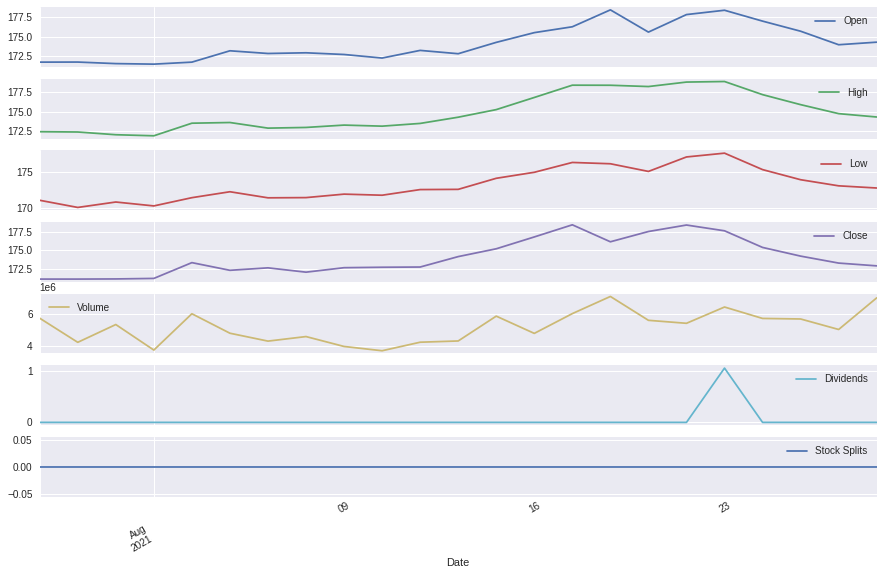

In [414]:
ticker_hist = ticker.history()
fig2 = ticker_hist.plot(kind = 'line',figsize = (15,10), subplots=True);
plt.savefig('history plot.png')